<a href="https://colab.research.google.com/github/fitriademiar/Study-Independen/blob/main/CNN_Indonesian_Food_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification menggunakan CNN

##Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<img src="https://asset.kompas.com/crops/MVYZa0srvFsVsEPCA3X_qpffmBc=/44x8:1000x645/483x300/data/photo/2019/12/18/5df9e59f4c8b0.jpg">

Dataset yang akan kita gunakan adalah dataset makanan Indonesia yang diambil sebagian dari Kaggle. Dataset dapat didownload [disini](https://drive.google.com/file/d/12aMkT21BxaTkf_FlPYS7fxzDZjunMv-O/view). Setelah dataset diunduh, simpan file zip nya di drive. Kemudian panggil perintah berikut untuk melakukan ekstraksi dataset.

In [ ]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/dataset_food.zip",'r') as zip_ref:
  zip_ref.extractall('./')


##Load Dataset

Di dalam dataset tersebut, terdapat 3 partisi data yang berbeda. Yaitu data training, validation dan juga testing. Berikut adalah perintah untuk melakukan proses loading gambar-gambar di dataset yang sudah kita ekstrak sebelumnya.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Semua gambar (pixelnya) di rescale menjadi rentang 0-1
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

#Proses load data train
train_generator = train_datagen.flow_from_directory(
    '/content/dataset_food/train', #Source dari data train
    classes = ['bakso', 'gado', 'gudeg', 'rendang', 'sate'],
    target_size = (200,200), #Semua gambar akan dirize menjadi 200x200
    batch_size=16)

#Proses load data validation
validation_generator = validation_datagen.flow_from_directory(
    '/content/dataset_food/valid', #Source dari data validation
    classes = ['bakso', 'gado', 'gudeg', 'rendang', 'sate'],
    target_size = (200,200), #Semua gambar akan dirize menjadi 200x200
    batch_size=16,
    shuffle=False)

#Proses load data test
test_generator = test_datagen.flow_from_directory(
    '/content/dataset_food/train', #Source dari data test
     classes = ['bakso', 'gado', 'gudeg', 'rendang', 'sate'],
    target_size = (200,200), #Semua gambar akan dirize menjadi 200x200
    batch_size=16,
    shuffle=False)



Found 3949 images belonging to 5 classes.
Found 902 images belonging to 5 classes.
Found 3949 images belonging to 5 classes.


##Modeling

###import library

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import Dense, MaxPooling2D, Dropout, Conv2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, Accuracy
from tensorflow.keras.callbacks import EarlyStopping

###Model arsitektur CNN

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(200,200,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5, activation='softmax'))

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 64)        0

###Compile terhadap model

In [ ]:
from tensorflow.keras.metrics import Recall, Precision

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics = [Recall(), Precision(), "accuracy"]
)

###Memberhentikan proses training, jika nilai loss dalam 3 iterasi selanjutnya sudah tidak menurun

In [ ]:
model_callback = EarlyStopping(
    monitor = 'loss',
    verbose = 1,
    mode ='min',
    patience = 3
)


###Training

In [ ]:
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 30,
    steps_per_epoch = 50,
    callbacks = [model_callback],
    verbose = 1
)

Epoch 1/30
50/50 [==============================] - 55s 1s/step - loss: 1.5205 - recall: 0.0150 - precision: 0.3871 - accuracy: 0.3050 - val_loss: 1.2563 - val_recall: 0.0710 - val_precision: 0.8000 - val_accuracy: 0.5044
Epoch 2/30
50/50 [==============================] - 39s 782ms/step - loss: 1.3702 - recall: 0.1400 - precision: 0.5385 - accuracy: 0.4250 - val_loss: 1.2616 - val_recall: 0.1552 - val_precision: 0.7650 - val_accuracy: 0.4878
Epoch 3/30
50/50 [==============================] - 41s 824ms/step - loss: 1.2762 - recall: 0.1932 - precision: 0.6087 - accuracy: 0.4705 - val_loss: 1.1554 - val_recall: 0.2605 - val_precision: 0.7187 - val_accuracy: 0.5377
Epoch 4/30
50/50 [==============================] - 41s 823ms/step - loss: 1.2161 - recall: 0.2673 - precision: 0.6377 - accuracy: 0.5119 - val_loss: 1.0825 - val_recall: 0.3282 - val_precision: 0.7081 - val_accuracy: 0.5776
Epoch 5/30
50/50 [==============================] - 41s 833ms/step - loss: 1.0898 - recall: 0.3525 - pr

###Prediksi Data test

In [ ]:
model.evaluate(test_generator)

247/247 [==============================] - 53s 212ms/step - loss: 0.1199 - recall: 0.9575 - precision: 0.9742 - accuracy: 0.9673


[0.11988725513219833,
 0.9574576020240784,
 0.9742334485054016,
 0.9673334956169128]

###Visualisasi nilai loss dari setiap iterasi training yang terjadi

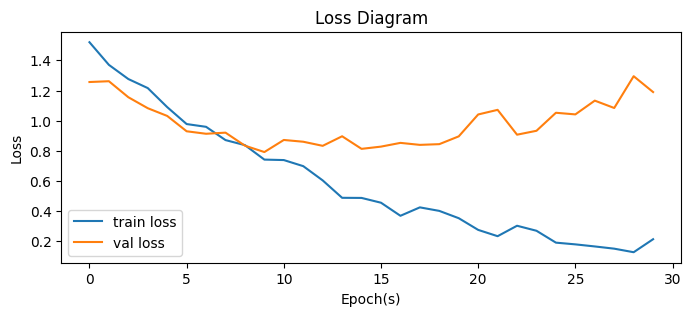

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,3))
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])
plt.legend(['train loss', 'val loss'])
plt.title('Loss Diagram')
plt.xlabel('Epoch(s)')
plt.ylabel('Loss')
plt.show()


###Simpan model

In [ ]:
model.save('model_acc_89.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Lakukan predict ke gambar baru

##Prediksi Gambar Baru

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(200, 200));
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)

  classes = model.predict(img_array/255);

  for i, class_ in enumerate(classes[0]):
      if class_ == classes[0].max():
          if i == 0:
              print("bakso")
          elif i == 1:
              print("gado")
          elif i == 2:
              print("gudeg")
          elif i == 3:
              print("rendang")
          else:
              print("sate")

Saving gambar.jpg to gambar.jpg
1/1 [==============================] - 0s 169ms/step
rendang
